In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine
import mysql.connector
import pickle

%matplotlib inline

In [2]:
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [3]:
# Connect to MySQL database
conn = mysql.connector.connect(host='127.0.0.1', user='root', passwd=password)
cursor = conn.cursor()

#Select the database
cursor.execute("USE vanguard")

In [4]:
cursor.execute("""
                    SELECT clients.client_id,
                        clients.clnt_age, 
                        clients.gendr, 
                        COUNT(distinct(interactions.process_step)) AS count_of_steps,
                        group_id.variation
                    FROM clients
                    JOIN interactions
                    ON clients.client_id = interactions.client_id
                    INNER JOIN group_id
                    ON group_id.client_id = clients.client_id
                    GROUP BY clients.client_id, clients.clnt_age, clients.gendr,group_id.variation;

                    """)
results = cursor.fetchall()

how_far = pd.DataFrame(results)

In [11]:
#rename columns to be descriptive

how_far.rename(columns = {0:'client_id',1:'age',2:'gender',3:'steps_reached',4:'group_status'},inplace=True)
how_far

# Frequency table 
frequency_table = how_far['steps_reached'].value_counts()

# Calculating the proportion of people that reached and stopped at each step
proportion_table = how_far['steps_reached'].value_counts(normalize=True)

proportion_table, frequency_table


(steps_reached
 5    0.664238
 1    0.118436
 4    0.093129
 2    0.069347
 3    0.054851
 Name: proportion, dtype: float64,
 steps_reached
 5    33544
 1     5981
 4     4703
 2     3502
 3     2770
 Name: count, dtype: int64)

In [12]:
how_far

client_id   age gender  steps_reached group_status
0       1000062  52.5      F              5      Control
1       1000353  59.0      U              5      Control
2       1000536  27.0      U              5      Control
3       1000672  65.5      F              5      Control
4       1001101  61.5      M              5         Test
...         ...   ...    ...            ...          ...
50495   9999150  30.0      U              2         Test
50496   9999400  28.5      U              5         Test
50497   9999626  35.0      M              2         Test
50498   9999729  31.0      F              5         Test
50499   9999832  49.0      F              2         Test

[50500 rows x 5 columns]

<Axes: xlabel='steps_reached,group_status'>

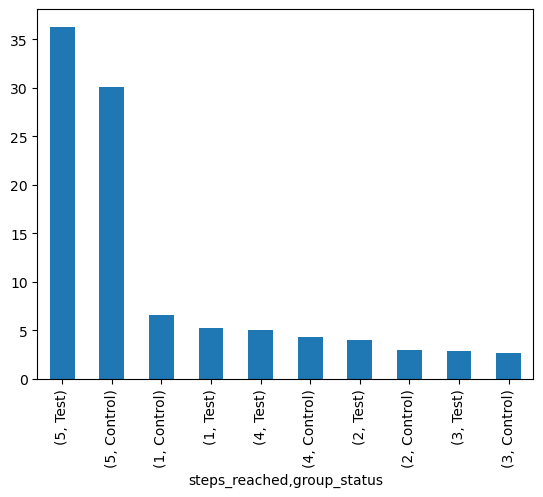

In [14]:
proportion_status = how_far[['steps_reached','group_status']].value_counts(normalize=True)
proportion_percent = proportion_status * 100 
proportion_percent

#bar with test groups proportions
proportion_percent.plot(kind="bar")


How to calculate abandonment rate Abandonment rate = (Number of intended tasks completed) / (Number of intended tasks initiated) x 100

How to calculate cart abandonment rate for ecommerce stores

Cart abandonment rate = (Number of carts abandoned / Number of orders initiated) x 100

In [16]:
proportion_status

how_far['steps_reached'].value_counts()

steps_reached
5    33544
1     5981
4     4703
2     3502
3     2770
Name: count, dtype: int64

In [25]:
#assuming everyone who completed went through all 5 steps
completed =  33544
dnf = 16956
initiated = 50500

# Calculate abandonment rate
abandonment_rate = (dnf / initiated) * 100
completion_rate = (completed / initiated) * 100

# Print abandonment rate
print("Abandonment rate of full group: {:.2f}%".format(abandonment_rate))
print("Completion rate of full group: {:.2f}%".format(completion_rate))



Abandonment rate: 33.58%
Completion rate: 66.42%


In [28]:
with open('control_dnf.pkl', 'rb') as f:
    control_dnf = pickle.load(f)

control_dnf

with open('control_confirmed.pkl', 'rb') as f:
    control_confirmed = pickle.load(f)

control_confirmed

#8098 people from the control group abandoned the process
#15434 people from the control group completed the process
#the control group in total is 23532


#assuming everyone who completed went through all 5 steps
complete_control = 15434
dnf_control = 8098
initiated = 23532

# Calculate abandonment rate
abandonment_rate_control = (dnf_control / initiated) * 100
completion_rate_control = (complete_control / initiated) * 100

# Print abandonment rate
print("Abandonment rate of control group: {:.2f}%".format(abandonment_rate))
print("Completion rate of control group: {:.2f}%".format(completion_rate))


0  1
0      4033851  3
1      6651403  1
2      2105948  1
3      9814849  1
4      4446011  1
...        ... ..
15429  1011862  4
15430  8930684  1
15431  4840338  3
15432  4210290  1
15433  1684561  1

[15434 rows x 2 columns]